In [166]:
from __future__ import division

In [3]:
%matplotlib inline
%autoreload 2

In [4]:
import matplotlib.pyplot as plt 

In [6]:
import sys
sys.path.append("../")

In [140]:
import get_gal_centroids as get_gal
from compare_methods import draw_gaussian
from plot_gal_prop import plot_cf_contour

# compare the confidence regions of different methods

In [119]:
bootNo = 100

## confidence region of shrinking aperture

In [121]:
gauss_data = [draw_gaussian(mean=np.ones(2), 
                            cov=np.eye(2), size=500) 
              for i in range(bootNo)]

In [132]:
shrink_peak = np.array([shrinking_apert(g_data, debug=False) 
                        for g_data in gauss_data])

In [136]:
shrink_peak_dens = get_gal.do_KDE(shrink_peak)
shrink_peak_dens = get_gal.convert_fhat_to_dict(shrink_peak_dens)

In [179]:
lvls = [68, 95]
b_colors = [(0 / 255., 0 / 255., i / (len(lvls) + 1.)) 
          for i in range(1, len(lvls) + 1)]

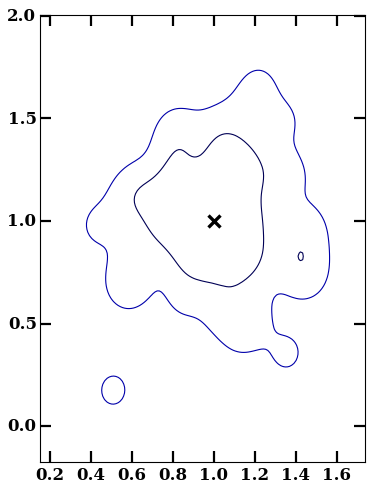

In [174]:
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens["estimate"],
                shrink_peak_dens["eval_points"][0],
                shrink_peak_dens["eval_points"][1],
                colors=colors)
plt.plot(1, 1, "kx", mew=3, label="True center", markersize=10)

## get the same estimates from KDE 

In [151]:
KDE_fhat = [get_gal.do_KDE_and_get_peaks(g_data) for g_data in gauss_data]
KDE_peaks = np.array([np.array([fhat["peaks_xcoords"][0], 
                                fhat["peaks_ycoords"][0]]) for fhat in 
                      KDE_fhat])

In [181]:
lvls = [68, 95]
g_colors = [(0 / 255., i / (len(lvls) + 1.), 0 / 255.) 
          for i in range(1, len(lvls) + 1)]

In [157]:
KDE_peak_dens = get_gal.do_KDE(KDE_peaks)
KDE_peak_dens = get_gal.convert_fhat_to_dict(KDE_peak_dens)

## Compute unweighted centroid instead 

In [233]:
get_gal.compute_weighted_centroids(gaussian)

array([ 0.97834126,  1.00492824])

In [234]:
cent_fhat = [get_gal.compute_weighted_centroids(g_data) 
             for g_data in gauss_data]

In [238]:
r_colors = [( i / (len(lvls) + 1.), 0 / 255., 0 / 255.) 
            for i in range(1, len(lvls) + 1)]

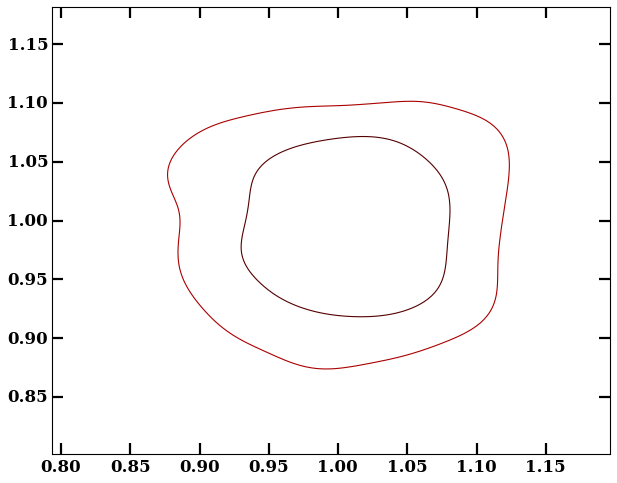

In [239]:
cent_peak_dens = get_gal.do_KDE(cent_fhat)
cent_peak_dens = get_gal.convert_fhat_to_dict(cent_peak_dens)
plot_cf_contour(cent_peak_dens["estimate"],
                cent_peak_dens["eval_points"][0],
                cent_peak_dens["eval_points"][1],
                colors=r_colors)

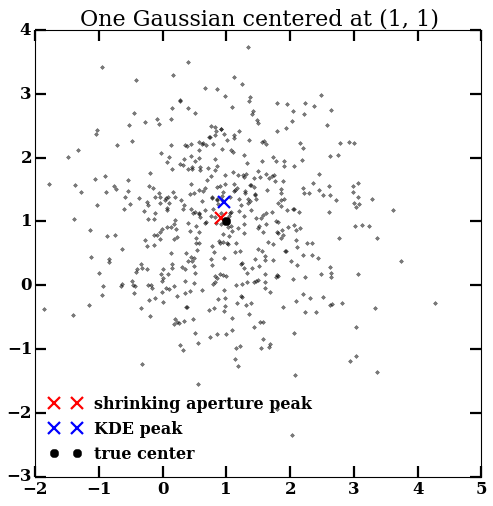

In [127]:
plt.axes().set_aspect('equal')
plt.plot(gaussian[:, 0], gaussian[:, 1], 'k.', alpha=.5)
plt.plot(c1[0], c1[1], "rx", label="shrinking aperture peak",
         mew=2, markersize=10)
plt.plot(fhat1["peaks_xcoords"][0], fhat1["peaks_ycoords"][0], "bx",
         mew=2, markersize=10, label="KDE peak")
plt.plot(1, 1, "ko", label="true center", markersize=8)
plt.legend(loc='best', frameon=False)
plt.title("One Gaussian centered at (1, 1)", size=20)

##  Combined all the confidence regions

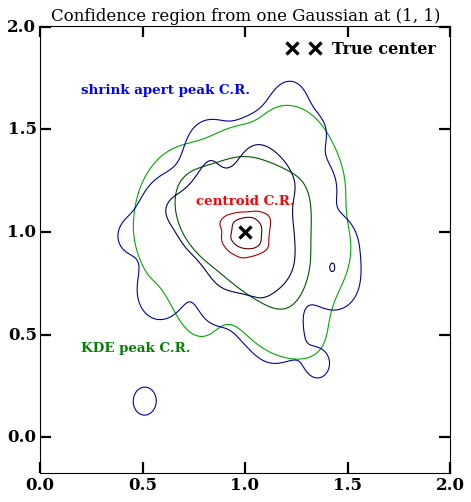

In [248]:
plt.axes().set_aspect('equal')
plot_cf_contour(KDE_peak_dens["estimate"],
                KDE_peak_dens["eval_points"][0],
                KDE_peak_dens["eval_points"][1],
                colors=g_colors)
plt.annotate('KDE peak C.R.', (0.1, 0.27), textcoords='axes fraction',
             color='g')
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens["estimate"],
                shrink_peak_dens["eval_points"][0],
                shrink_peak_dens["eval_points"][1],
                colors=b_colors)
plt.annotate('shrink apert peak C.R.', (0.1, 0.85), 
             textcoords='axes fraction',
             color='b')
cent_peak_dens = get_gal.do_KDE(cent_fhat)
cent_peak_dens = get_gal.convert_fhat_to_dict(cent_peak_dens)
plot_cf_contour(cent_peak_dens["estimate"],
                cent_peak_dens["eval_points"][0],
                cent_peak_dens["eval_points"][1],
                colors=r_colors)
plt.annotate('centroid C.R.', (0.38, 0.6), 
             textcoords='axes fraction',
             color='r')
plt.plot(1, 1, "kx", mew=3, label="True center", markersize=10)
plt.xlim(0, 2.0)
plt.legend(loc='best', frameon=False)
plt.title('Confidence region from one Gaussian at (1, 1)',
          fontsize=15) 

# Test 2 - one big gaussian, one small close by gaussian

In [279]:
gaussian1 = draw_gaussian(mean=np.zeros(2), 
                          cov=np.eye(2) * 0.25, size=40)
gaussian2 = draw_gaussian(mean=np.ones(2) * 2,
                          cov=np.eye(2), size=400)

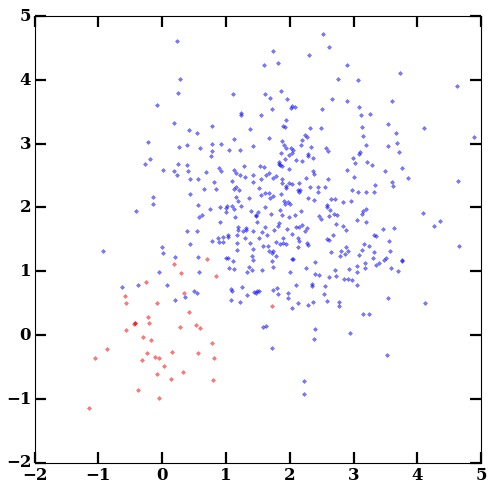

In [280]:
plt.axes().set_aspect('equal')
plt.plot(gaussian1[:, 0], gaussian1[:, 1], 'r.',
         alpha=0.5)
plt.plot(gaussian2[:, 0], gaussian2[:, 1], 'b.',
         alpha=0.5)

In [282]:
biData = bimodal_gaussian()

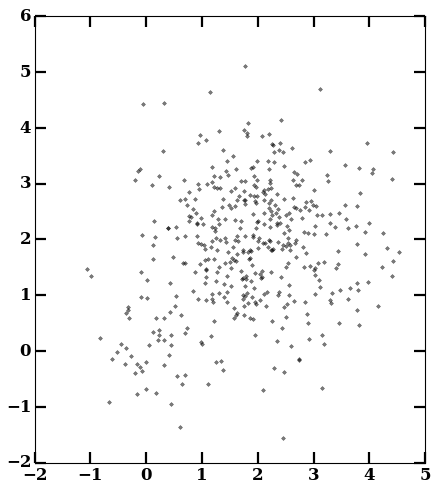

In [285]:
plt.axes().set_aspect('equal')
def bimodal_gaussian():
    gaussian1 = draw_gaussian(mean=np.zeros(2), 
                         cov=np.eye(2) * 0.25, size=40)
    gaussian2 = draw_gaussian(mean=np.ones(2) * 2,
                          cov=np.eye(2), size=400)
    return np.vstack((gaussian1, gaussian2))

plt.plot(biData[:, 0], biData[:, 1], 'k.',
         alpha=0.5)

In [286]:
bimodal_data = [bimodal_gaussian() for i in range(bootNo)]

In [287]:
shrink_peaks = np.array([shrinking_apert(bi_data) 
                        for bi_data in bimodal_data])

In [288]:
shrink_peak_dens1 = get_gal.do_KDE(shrink_peaks)
shrink_peak_dens1 = get_gal.convert_fhat_to_dict(shrink_peak_dens1)

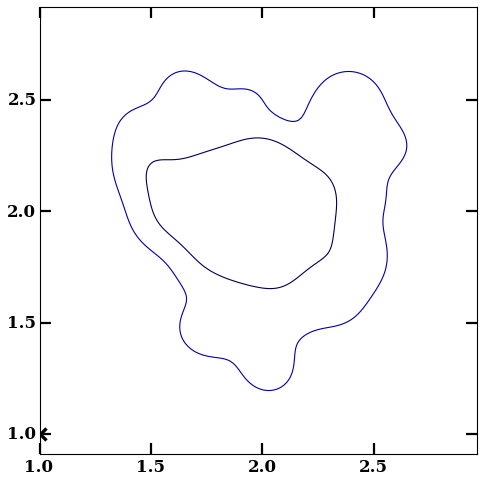

In [290]:
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens1["estimate"],
                shrink_peak_dens1["eval_points"][0],
                shrink_peak_dens1["eval_points"][1],
                colors=b_colors)
plt.plot(1, 1, "kx", mew=3, label="True center", markersize=10)

## compute the confidence region for the KDE 

In [ ]:
KDE_fhat1 = [get_gal.do_KDE_and_get_peaks(g_data) for g_data in bimodal_data]
KDE_peaks1 = np.array([np.array([fhat1["peaks_xcoords"][0], 
                                 fhat1["peaks_ycoords"][0]]) for fhat1 in 
                       KDE_fhat1])

## example for one set of data

In [116]:
c1_comb

array([-1.166403  , -0.53406905])

In [128]:
fhat = get_gal.do_KDE_and_get_peaks(comb_gauss)

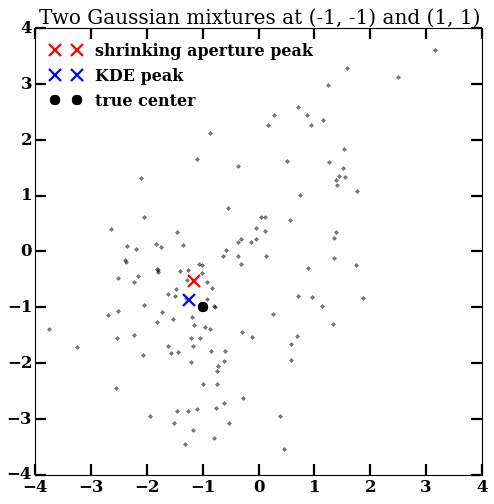

In [129]:
plt.axes().set_aspect('equal')
plt.plot(comb_gauss[:, 0], comb_gauss[:, 1], 'k.', alpha=.5)
plt.plot(c1_comb[0], c1_comb[1], "rx", label="shrinking aperture peak",
         mew=2, markersize=10)
plt.plot(fhat["peaks_xcoords"][0], fhat["peaks_ycoords"][0], "bx",
         mew=2, markersize=10, label="KDE peak")
plt.plot(-1, -1, "ko", label="true center",
         mew=2, markersize=8)
plt.legend(loc='best', frameon=False)
plt.title("Two Gaussian mixtures at (-1, -1) and (1, 1)", size=18)